# Linear Regression with Gradient Descent

Practicing linear regression with gradient descent implemented from scratch.

Data taken from UCI Auto MPG dataset: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

Using **auto weight** to predict **mpg**.

## Implement Gradient Descent

Following the videos in on Coursera (http://coursera.org/learn/machine-learning/) week two and this stack overflow question: http://stackoverflow.com/questions/17784587.

In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np
import random

class MyGradientDescent():
    
    def __init__(self):
        self._theta = None
        
    def fit(self, x, y, alpha = 0.0005, numIter = 10000, verbose=False):
        '''
        Parameters
        ----------

        x: m by n numpy feature matrix, one row per sample
        y: m by 1 numpy response variable column vector, one row per sample
        alpha: learning rate
        numIter: max number of iterations to run
        verbose: if True, this function will print the mse every 100 iterations
        '''
    
        # m is the number of samples.
        # n is the number of features.
        m, n = x.shape

        # Copy, scale, and prepend x and theta with a column of ones.
        # Explained here: http://stats.stackexchange.com/questions/181603
        x = x.copy()
        x = self._scale(x)
        x = np.column_stack((np.ones(shape=(m,1)),x))
        self._theta = np.ones(n + 1)
        
        # Transpose for multiplication. xT is n * m.
        xT = x.transpose()

        for i in range(0, numIter):

            # Get the current hypothesis by multiplying the feature matrix by the theta weights.
            # x dot theta is (m by n) * (n by 1)
            hypothesis = np.dot(x, self._theta)

            # Calculate the error from this hypothesis.
            # This is vectorized, error will be (m by 1)
            error = hypothesis - y
            
            # Get mean squared error, helpful for printing for each iteration.
            if verbose:
                if i % 100 == 0:
                    mse = mean_squared_error(hypothesis, y)
                    print('iteration %d | mse %f' % (i, mse))

            # Calculate the gradient, gradient will be (m by 1).
            gradient = (1/m) * np.dot(xT, error)

            # Update the weights based on the gradient.
            self._theta = self._theta - (alpha * gradient)
        
        return self._theta
    
    def predict(self, x):
        m, n = x.shape
        ones = np.ones(shape=(m,1))
        x_scaled = self._scale(x)
        x_ones = np.column_stack((ones,x_scaled))
        return np.dot(x_ones, self._theta)
    
    def _mse(self, A, B):
        return np.sum((A - B) ** 2) / A.shape[0]
    
    def _scale(self, A):
        return (A - np.mean(A)) / np.std(A)

## Load the Data

Using weight as the feature and mpg as the dependent variable.

It's important to center this data (mean of 0, stddev of 1). If you don't center the data, the linear regression will not converge - at least not with the parameters set here. You'll see that the MyLinearRegression class takes care of the centering, as does the Scikit-Learn LinearRegression class.

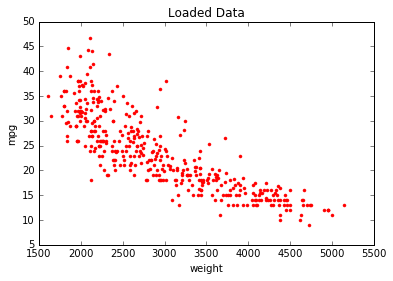

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
df = pd.read_csv('./data/auto-mpg.data', names=names, header=None, delim_whitespace=True)

x = df[['weight']].values
y = df['mpg'].values

plt.title('Loaded Data')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.plot(x, y, 'r.')
plt.show()

## Predict a Line of Best Fit

Note - there is no test/train split here, just fitting a line through all the data.


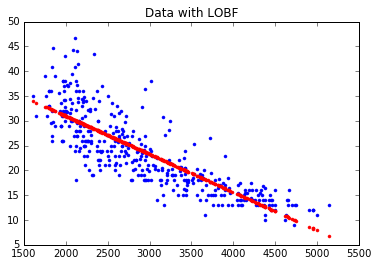

mse = 18.780941


In [12]:
from sklearn.metrics import mean_squared_error

model = MyGradientDescent()
model.fit(x, y, verbose=False, numIter=20000)
predicted = model.predict(x)
mse = mean_squared_error(predicted,y)

plt.title('Data with LOBF')
plt.plot(x, y, 'b.')
plt.plot(x, predicted, 'r.')
plt.show()

print('mse = %lf' % (mse))

## Compare to Scikit-Learn Implementation

Scikit learn has a solid LinearRegression implementation. Let's compare the mean squared error.

They both evaluate to a mean squared error ~18.78.

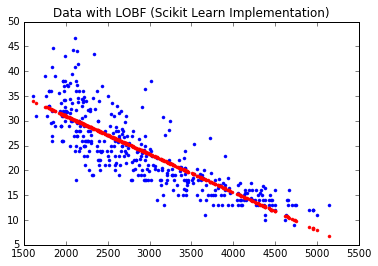

mse = 18.780940


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x,y)

predicted = model.predict(x)
mse = mean_squared_error(predicted, y)

plt.title('Data with LOBF (Scikit Learn Implementation)')
plt.plot(x, y, 'b.')
plt.plot(x, predicted, 'r.')
plt.show()

print('mse = %lf' % (mse))

## Scratch Code

Disregard the code below. This was a prior implementation.

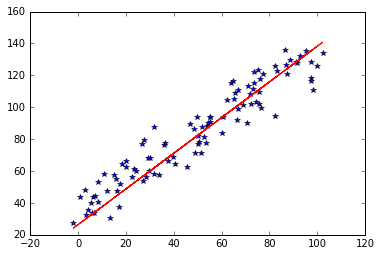

In [14]:
import numpy as np
import random

def gradientDescent(x, y, alpha, numIter):
    '''
    Parameters
    ----------
    
    x: m by n numpy feature matrix, one row per sample
    y: m by 1 numpy response variable column vector, one row per sample
    theta: n by 1 feature weights
    alpha: learning rate
    numIter: max number of iterations to run
    
    '''
    # m is the number of samples.
    # n is the number of features.
    m, n = x.shape
    
    # Make a copy of x and prepend x and theta with a column of ones.
    # Explained here: http://stats.stackexchange.com/questions/181603
    x = x.copy()
    x = np.column_stack((np.ones(shape=(m,1)),x))
    theta = np.ones(n + 1)
    
    
    # Transpose for multiplication. xT is n * m.
    xT = x.transpose()
    
    for i in range(0, numIter):
        
        # Get the current hypothesis by multiplying the feature matrix by the theta weights.
        # x dot theta is (m by n) * (n by 1)
        hypothesis = np.dot(x, theta)
                
        # Calculate the error from this hypothesis.
        # This is vectorized, error will be (m by 1)
        error = hypothesis - y
        
        # Get mean squared error, helpful for printing for each iteration.
        # if i % 100 == 0:
            # meanSquaredError = np.sum(error ** 2) / (2*m)
            # print('iteration %d | cost %f' % (i, meanSquaredError))
        
        # Calculate the gradient, gradient will be (m by 1).
        gradient = (1/m) * np.dot(xT, error)
        
        # Update the weights based on the gradient.
        theta = theta - (alpha * gradient)
    
    # Return the last m columns.
    return theta

def predict(x, theta):
    # x gets copied and pre-prended with a column of ones.
    x = x.copy()
    x = np.column_stack((np.ones(shape=(m,1)),x))
    prediction = np.dot(x,theta)
    return prediction
    

def randomData(numSamples, numFeatures, bias, variance):
    x = np.zeros(shape=(numSamples, numFeatures))
    y = np.zeros(shape=numSamples)
    # basically a straight line
    for i in range(0, numSamples):
        for j in range(0, numFeatures):
            dist = random.uniform(0,20)
            x[i][j] = i + random.uniform(-dist,dist)
        # Target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

x, y = randomData(100, 1, 25, 20)
m, n = np.shape(x)
alpha = 0.0005
numIter = 10000

# Get the weights.
theta = gradientDescent(x, y, alpha, numIter)
predicted = predict(x, theta)

# Plot
plt.plot(x,y, 'b*')
plt.plot(x,predicted,'r')